In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_analysis.plot import Plots
from utils.read_data import DatasetUtils
from utils.constants import ACSIncome_categories, numerical_features

In [3]:
utils = DatasetUtils()
plots = Plots()

In [4]:
df_all = utils.get_acs_income_data()
df_all.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,ST,PINCP
0,18.0,1.0,18.0,5.0,4720.0,13.0,17.0,21.0,2.0,2.0,1.0,0
1,53.0,5.0,17.0,5.0,3605.0,18.0,16.0,40.0,1.0,1.0,1.0,0
2,41.0,1.0,16.0,5.0,7330.0,1.0,17.0,40.0,1.0,1.0,1.0,0
3,18.0,6.0,18.0,5.0,2722.0,1.0,17.0,2.0,2.0,1.0,1.0,0
4,21.0,5.0,19.0,5.0,3870.0,12.0,17.0,50.0,1.0,1.0,1.0,0


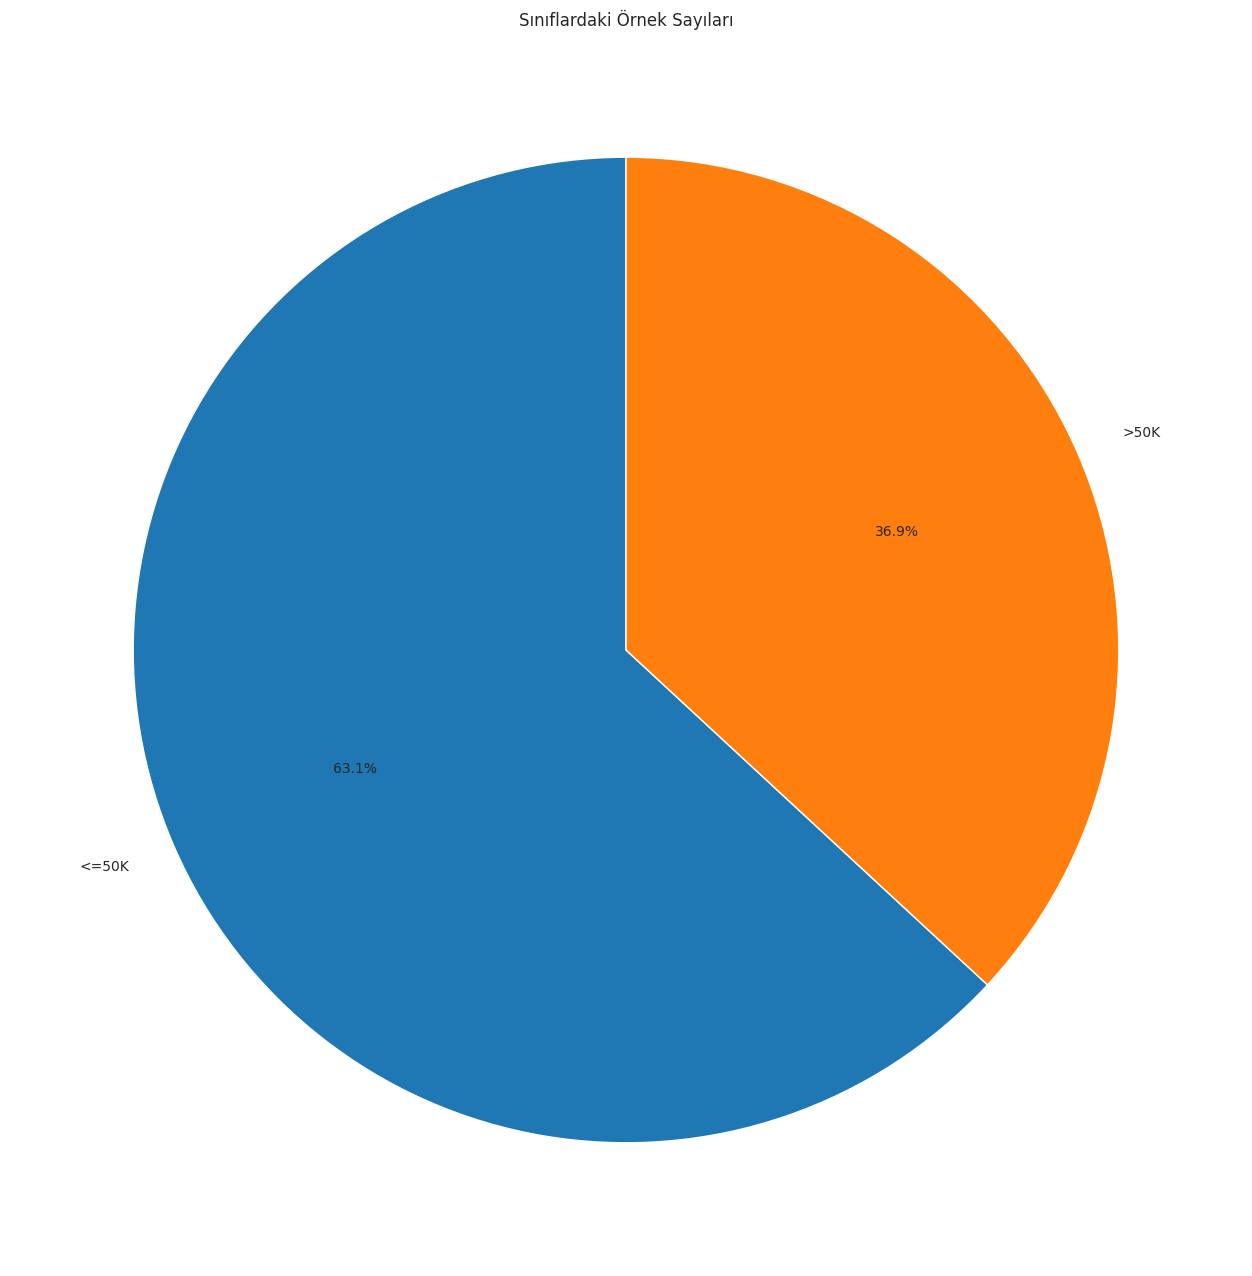

In [5]:
# sınıfların dağılımı
values, counts = np.unique(df_all.PINCP.values, return_counts=True)
plots.plot_pie_chart(labels=["<=50K", ">50K"], values=counts, title="Sınıflardaki Örnek Sayıları").show()

In [6]:
df_all.isna().sum()

AGEP     0
COW      0
SCHL     0
MAR      0
OCCP     0
POBP     0
RELP     0
WKHP     0
SEX      0
RAC1P    0
ST       0
PINCP    0
dtype: int64

In [7]:
df_all.isnull().sum()

AGEP     0
COW      0
SCHL     0
MAR      0
OCCP     0
POBP     0
RELP     0
WKHP     0
SEX      0
RAC1P    0
ST       0
PINCP    0
dtype: int64

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664500 entries, 0 to 1664499
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   AGEP    1664500 non-null  float64
 1   COW     1664500 non-null  float64
 2   SCHL    1664500 non-null  float64
 3   MAR     1664500 non-null  float64
 4   OCCP    1664500 non-null  float64
 5   POBP    1664500 non-null  float64
 6   RELP    1664500 non-null  float64
 7   WKHP    1664500 non-null  float64
 8   SEX     1664500 non-null  float64
 9   RAC1P   1664500 non-null  float64
 10  ST      1664500 non-null  float64
 11  PINCP   1664500 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 152.4 MB


In [9]:
print("Evlilik durumu ile ilgili farklı kategoriler:")
ACSIncome_categories["MAR"]

Evlilik durumu ile ilgili farklı kategoriler:


{1.0: 'Married',
 2.0: 'Widowed',
 3.0: 'Divorced',
 4.0: 'Separated',
 5.0: 'Never married or under 15 years old'}

{1.0: 908704, 2.0: 34582, 3.0: 178811, 4.0: 28452, 5.0: 513951}


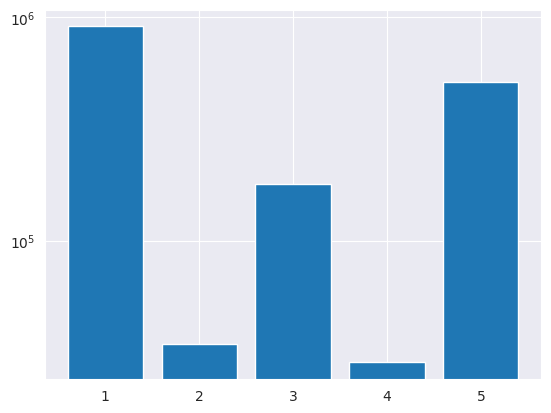

In [10]:
values, counts = np.unique(df_all.MAR.values, return_counts=True)
d_tmp = {v: c for v,c in zip(values, counts)}
print(d_tmp)
plt.bar(values, counts)
plt.yscale('log')

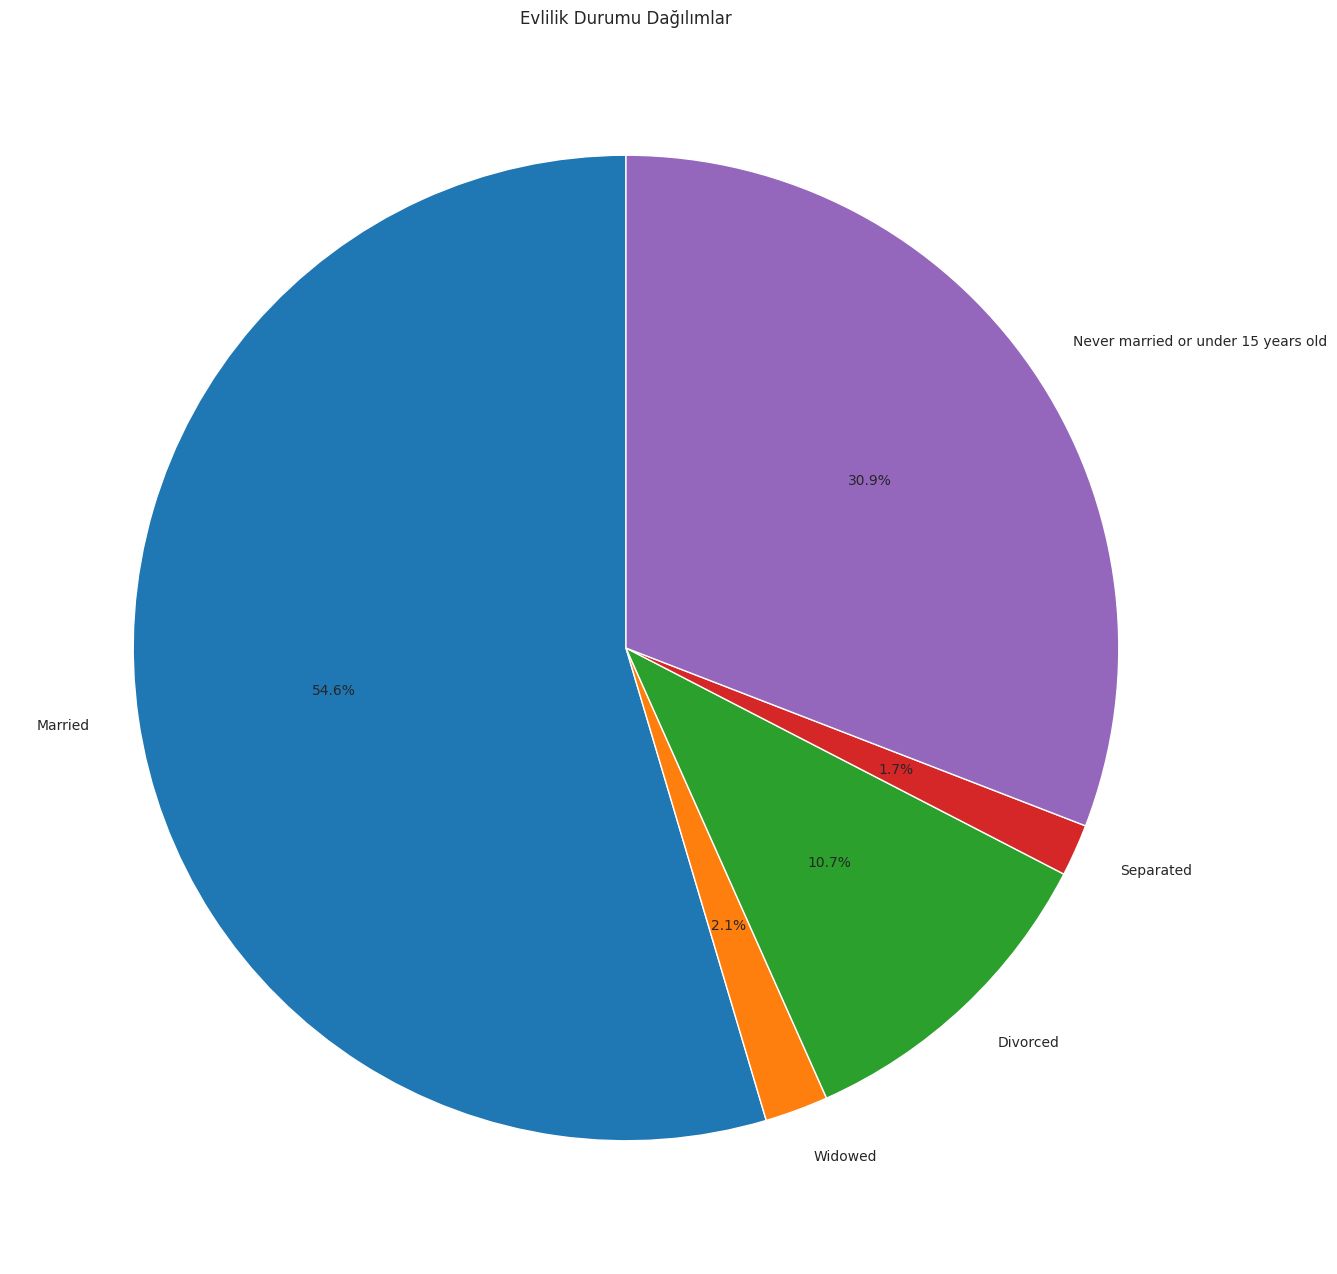

In [11]:
plots.plot_pie_chart(labels=["Married", "Widowed", "Divorced", "Separated", "Never married or under 15 years old"], values=counts, title="Evlilik Durumu Dağılımlar").show()

In [12]:
for key, value in ACSIncome_categories["MAR"].items():
    df_all.MAR.replace(key, value, inplace=True)

{1.0: 866735, 2.0: 797765}


<BarContainer object of 2 artists>

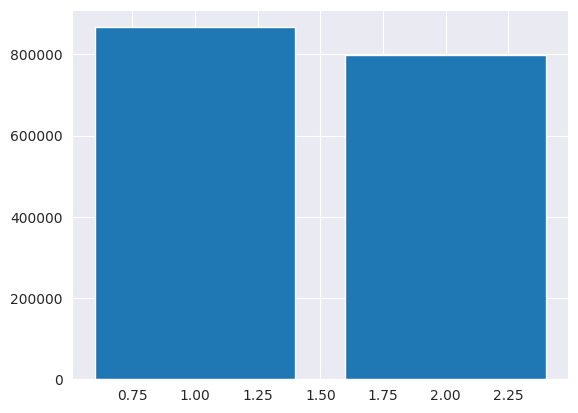

In [13]:
# cinsiyet veri alanı
values, counts = np.unique(df_all.SEX.values, return_counts=True)
d_tmp = {v: c for v,c in zip(values, counts)}
print(d_tmp)
plt.bar(values, counts)
# plt.yscale('log')

In [14]:
ACSIncome_categories["SEX"]

{1.0: 'Male', 2.0: 'Female'}

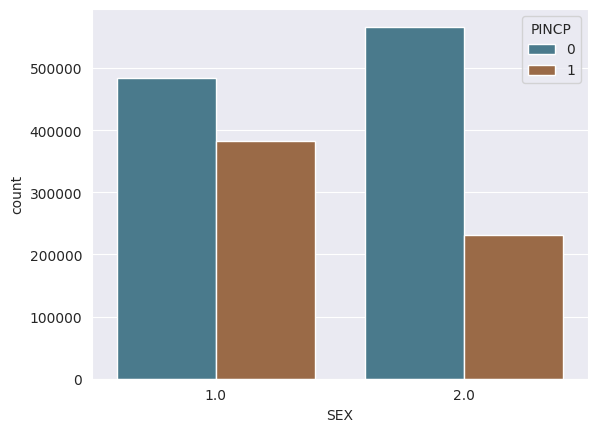

In [15]:
plots.plot_group_count_plot(df_all)

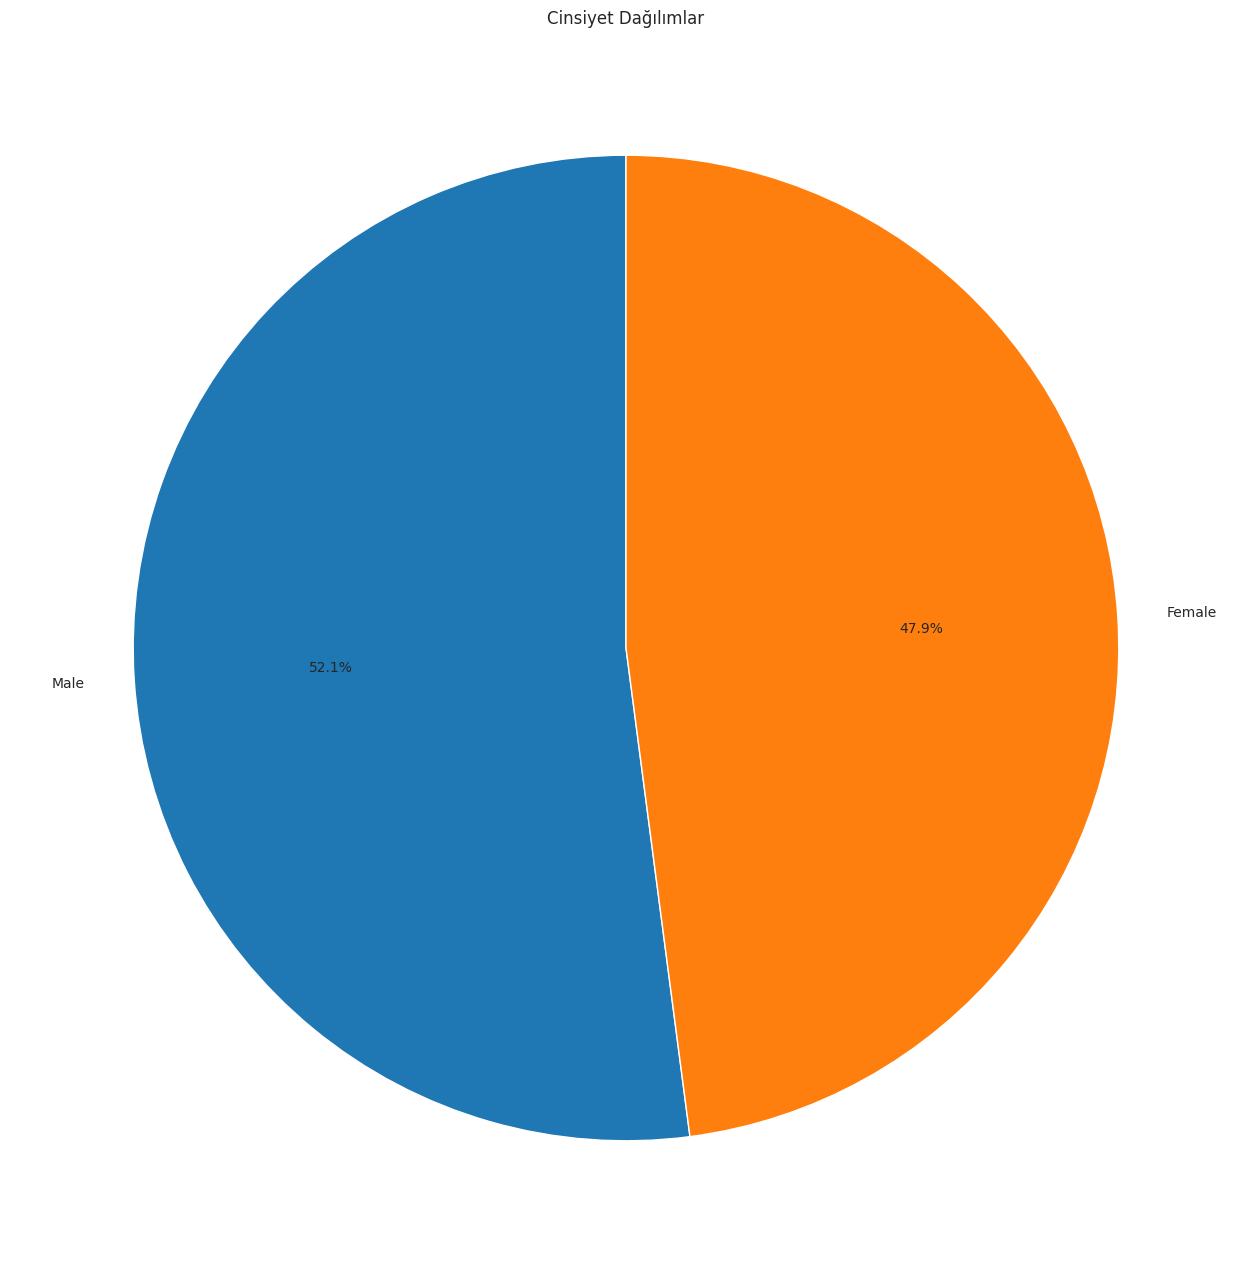

In [16]:
plots.plot_pie_chart(labels=["Male", "Female"], values=counts, title="Cinsiyet Dağılımlar").show()

In [17]:
for key, value in ACSIncome_categories["SEX"].items():
    df_all.SEX.replace(key, value, inplace=True)

In [18]:
# SCHL (Educational attainment)
ACSIncome_categories["SCHL"]

{1.0: 'No schooling completed',
 2.0: 'Nursery school, preschool',
 3.0: 'Kindergarten',
 4.0: 'Grade 1',
 5.0: 'Grade 2',
 6.0: 'Grade 3',
 7.0: 'Grade 4',
 8.0: 'Grade 5',
 9.0: 'Grade 6',
 10.0: 'Grade 7',
 11.0: 'Grade 8',
 12.0: 'Grade 9',
 13.0: 'Grade 10',
 14.0: 'Grade 11',
 15.0: '12th grade - no diploma',
 16.0: 'Regular high school diploma',
 17.0: 'GED or alternative credential',
 18.0: 'Some college, but less than 1 year',
 19.0: '1 or more years of college credit, no degree',
 20.0: "Associate's degree",
 21.0: "Bachelor's degree",
 22.0: "Master's degree",
 23.0: "Professional degree beyond a bachelor's degree",
 24.0: 'Doctorate degree'}

In [19]:
# 24 farklı kategori var ama 15'den düşük olanlar lise diplomasına sahip
# 15 Den küçükleri below lise diploması şeklinde tek bir sınıfa indirebiliriz
ACSIncome_categories["SCHL"].update({i: f'below high-school' for i in range(1,16)})

In [20]:
ACSIncome_categories["SCHL"]

{1.0: 'below high-school',
 2.0: 'below high-school',
 3.0: 'below high-school',
 4.0: 'below high-school',
 5.0: 'below high-school',
 6.0: 'below high-school',
 7.0: 'below high-school',
 8.0: 'below high-school',
 9.0: 'below high-school',
 10.0: 'below high-school',
 11.0: 'below high-school',
 12.0: 'below high-school',
 13.0: 'below high-school',
 14.0: 'below high-school',
 15.0: 'below high-school',
 16.0: 'Regular high school diploma',
 17.0: 'GED or alternative credential',
 18.0: 'Some college, but less than 1 year',
 19.0: '1 or more years of college credit, no degree',
 20.0: "Associate's degree",
 21.0: "Bachelor's degree",
 22.0: "Master's degree",
 23.0: "Professional degree beyond a bachelor's degree",
 24.0: 'Doctorate degree'}

In [21]:
for key, value in ACSIncome_categories["SCHL"].items():
    df_all.SCHL.replace(key, value, inplace=True)

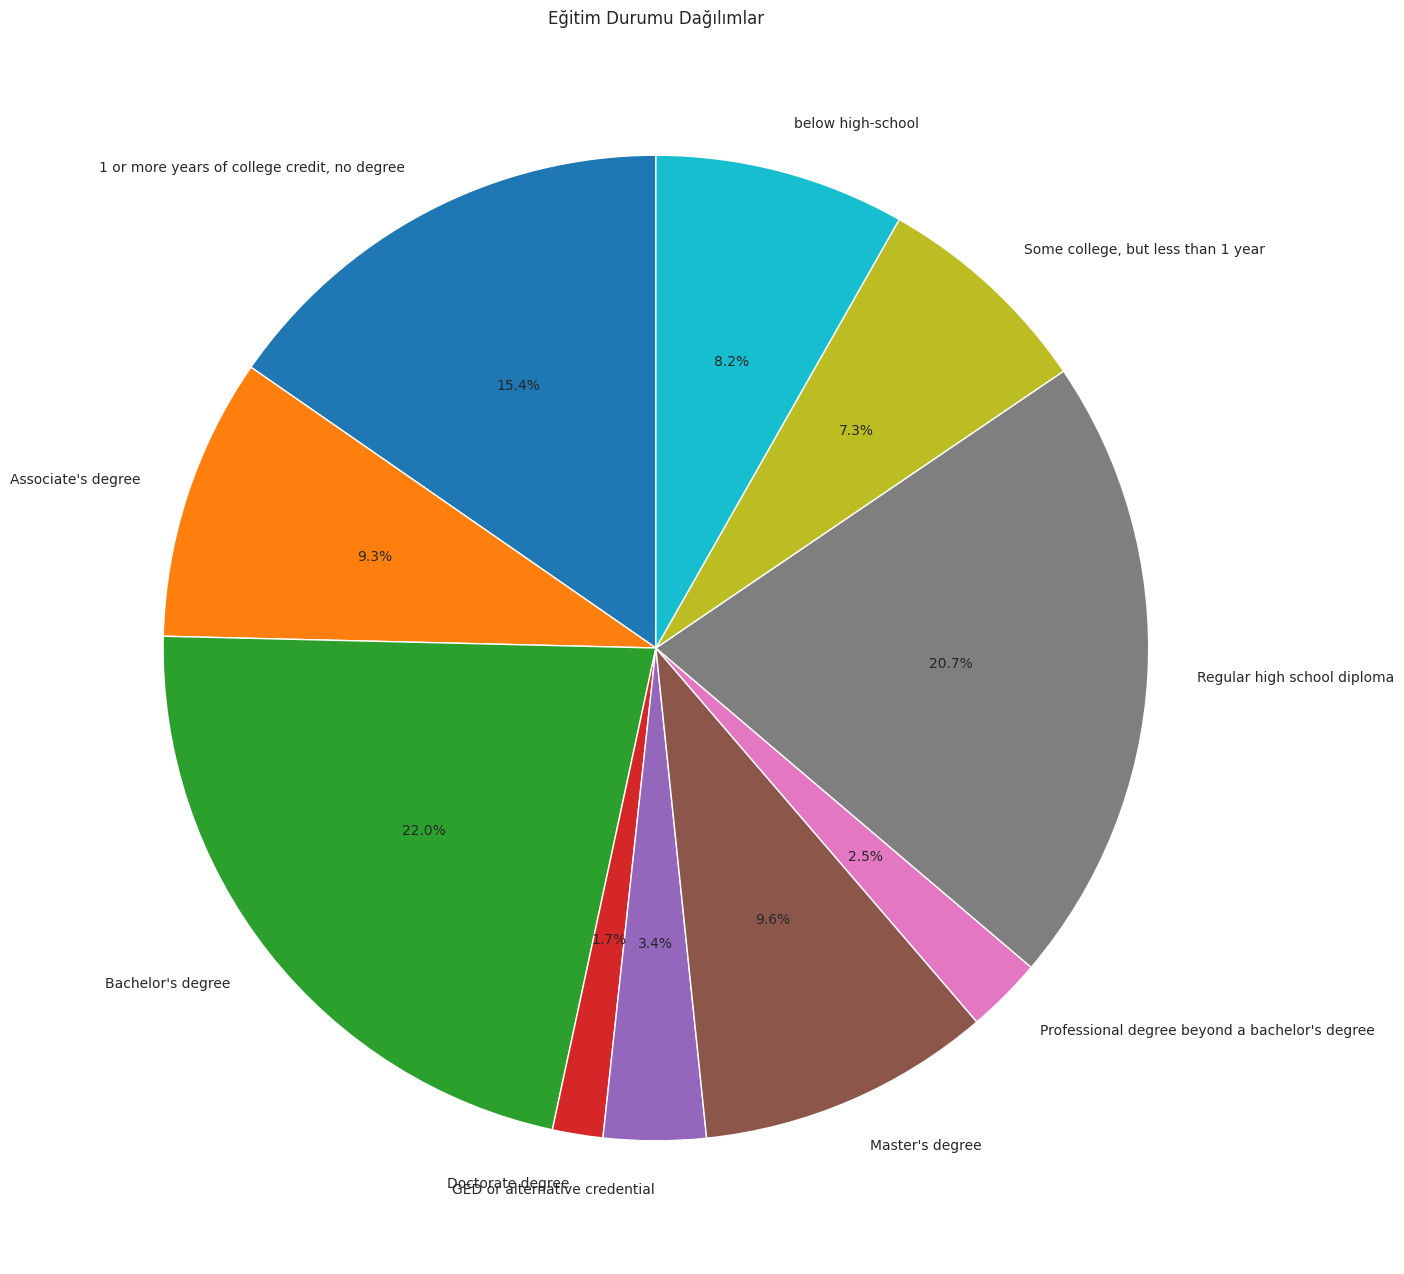

In [22]:
values, counts = np.unique(df_all.SCHL.values, return_counts=True)
plots.plot_pie_chart(labels=values, values=counts, title="Eğitim Durumu Dağılımlar").show()

In [23]:
# RAC1P race durumunu inceleyelim
for key, value in ACSIncome_categories["RAC1P"].items():
    df_all.RAC1P.replace(key, value, inplace=True)

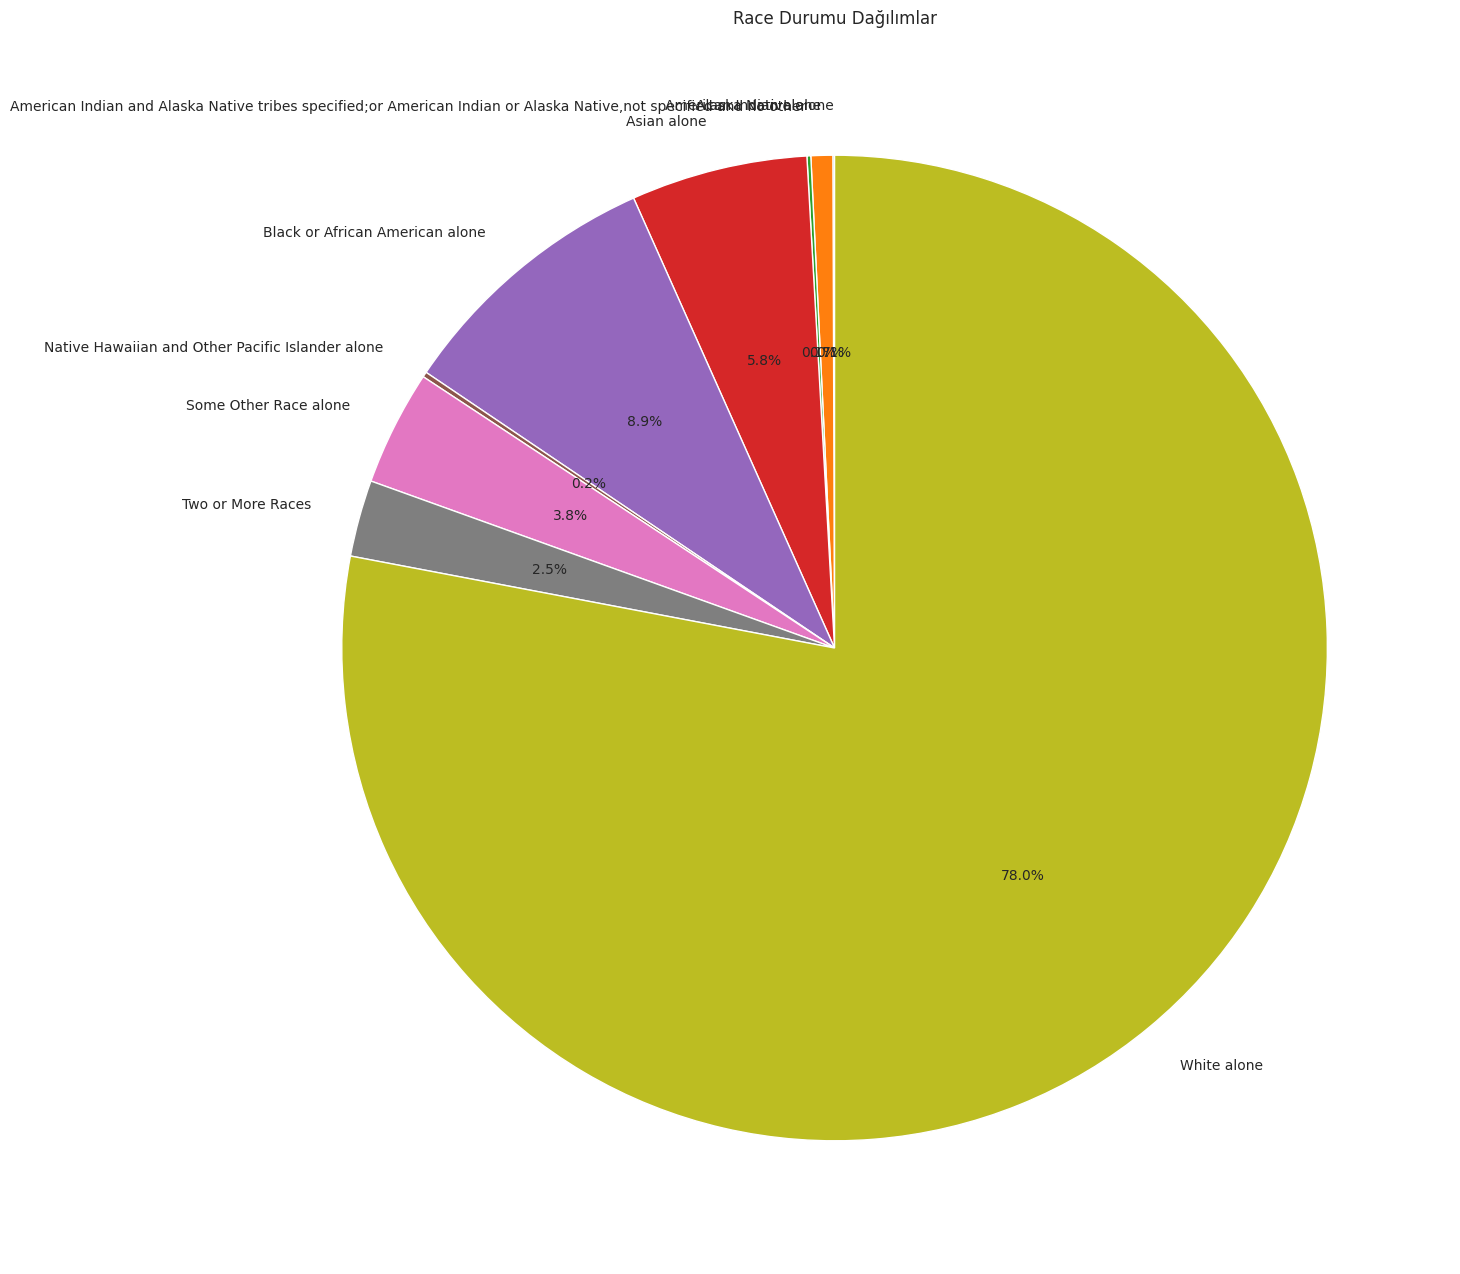

In [24]:
values, counts = np.unique(df_all.RAC1P.values, return_counts=True)
plots.plot_pie_chart(labels=values, values=counts, title="Race Durumu Dağılımlar").show()

In [25]:
df_all.head(50)

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,ST,PINCP
0,18.0,1.0,"Some college, but less than 1 year",Never married or under 15 years old,4720.0,13.0,17.0,21.0,Female,Black or African American alone,1.0,0
1,53.0,5.0,GED or alternative credential,Never married or under 15 years old,3605.0,18.0,16.0,40.0,Male,White alone,1.0,0
2,41.0,1.0,Regular high school diploma,Never married or under 15 years old,7330.0,1.0,17.0,40.0,Male,White alone,1.0,0
3,18.0,6.0,"Some college, but less than 1 year",Never married or under 15 years old,2722.0,1.0,17.0,2.0,Female,White alone,1.0,0
4,21.0,5.0,"1 or more years of college credit, no degree",Never married or under 15 years old,3870.0,12.0,17.0,50.0,Male,White alone,1.0,0
5,37.0,5.0,Regular high school diploma,Separated,9620.0,1.0,16.0,35.0,Male,Black or African American alone,1.0,0
6,19.0,1.0,"1 or more years of college credit, no degree",Never married or under 15 years old,5400.0,1.0,17.0,10.0,Female,White alone,1.0,0
7,51.0,1.0,Associate's degree,Divorced,5840.0,1.0,17.0,60.0,Female,White alone,1.0,0
8,18.0,1.0,"Some college, but less than 1 year",Never married or under 15 years old,4220.0,12.0,17.0,12.0,Female,White alone,1.0,0
9,18.0,7.0,"Some college, but less than 1 year",Never married or under 15 years old,4600.0,1.0,17.0,8.0,Female,White alone,1.0,0


In [26]:
# numerik veri alanları için analiz yapalım
df_all[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
AGEP,1664500.0,43.411271,15.302035,17.0,30.0,43.0,56.0,96.0
WKHP,1664500.0,38.333895,13.080731,1.0,35.0,40.0,44.0,99.0


In [27]:
# sınıflardaki gender dağılımlarını inceleyelim
df_all.groupby(['SEX', 'PINCP']).size()

SEX     PINCP
Female  0        566510
        1        231255
Male    0        483923
        1        382812
dtype: int64

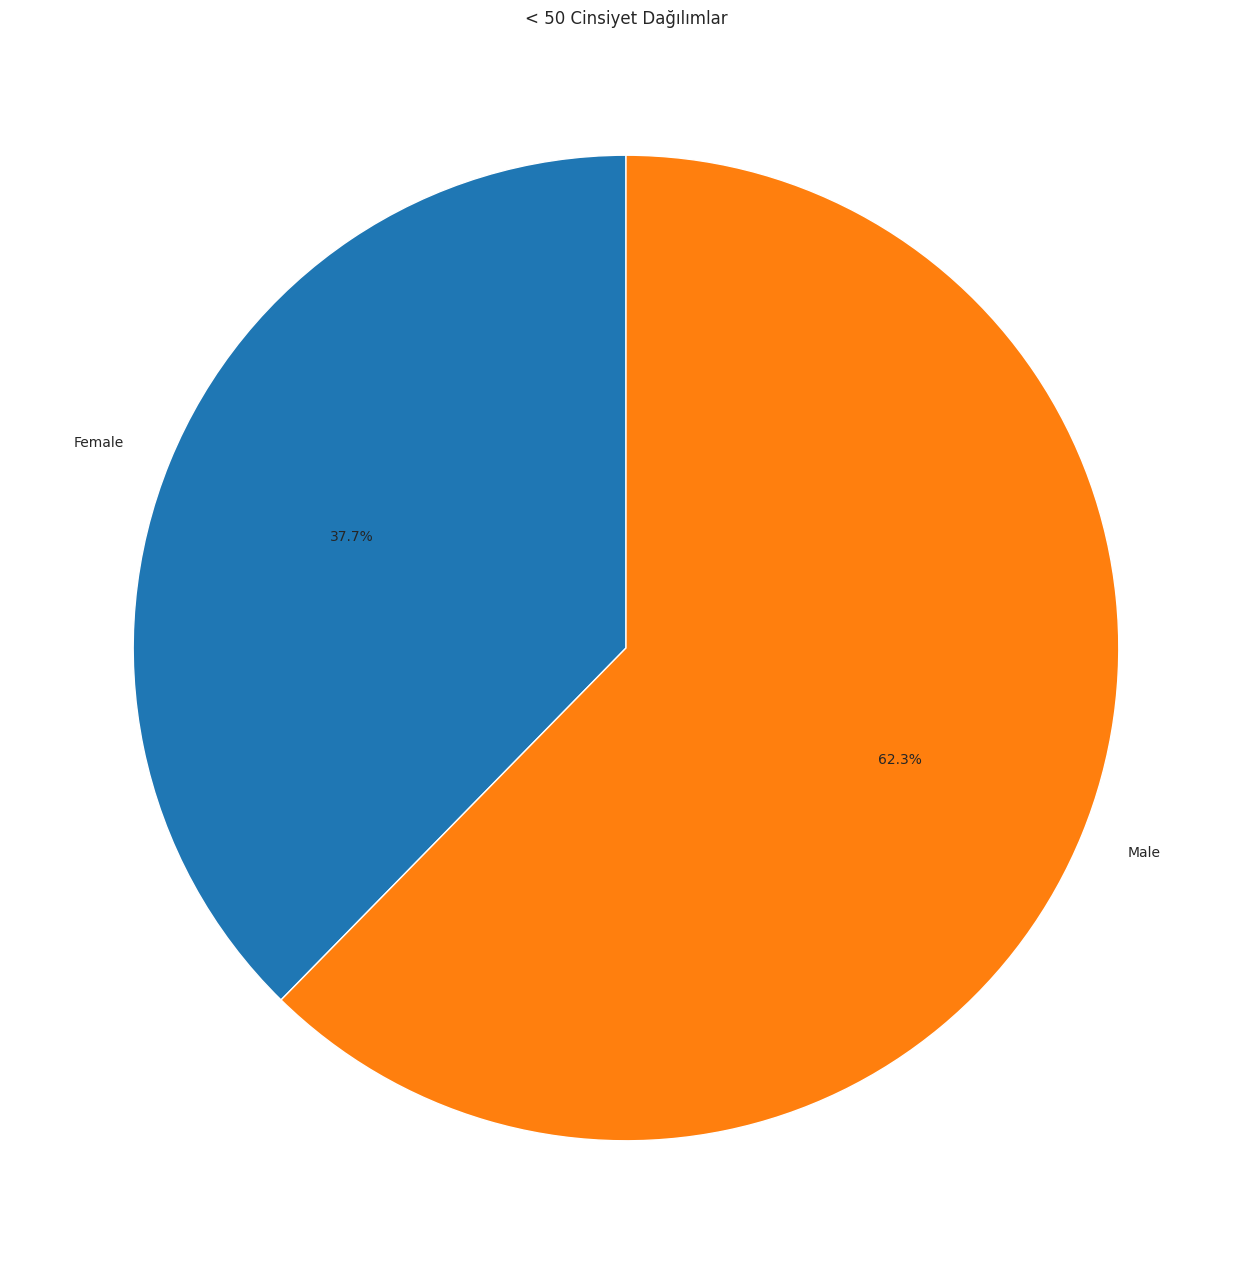

In [28]:
values, counts = np.unique(df_all[df_all.PINCP == 1].SEX.values, return_counts=True)
plots.plot_pie_chart(labels=values, values=counts, title="< 50 Cinsiyet Dağılımlar").show()

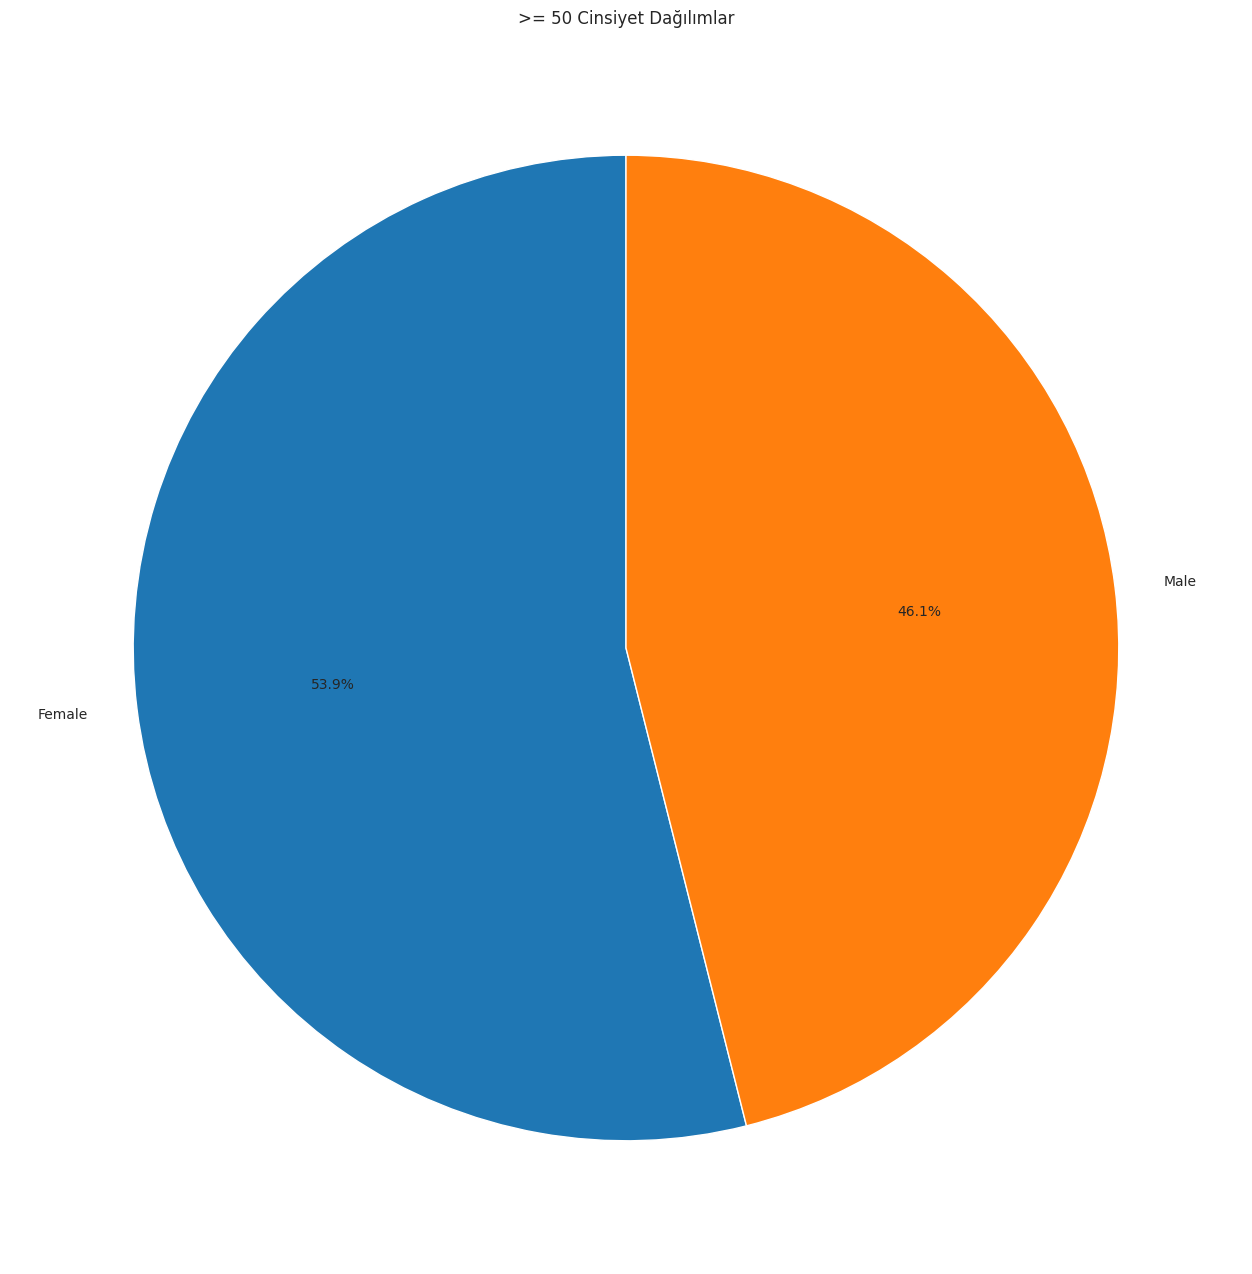

In [29]:
values, counts = np.unique(df_all[df_all.PINCP == 0].SEX.values, return_counts=True)
plots.plot_pie_chart(labels=values, values=counts, title=">= 50 Cinsiyet Dağılımlar").show()

In [30]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664500 entries, 0 to 1664499
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   AGEP    1664500 non-null  float64
 1   COW     1664500 non-null  float64
 2   SCHL    1664500 non-null  object 
 3   MAR     1664500 non-null  object 
 4   OCCP    1664500 non-null  float64
 5   POBP    1664500 non-null  float64
 6   RELP    1664500 non-null  float64
 7   WKHP    1664500 non-null  float64
 8   SEX     1664500 non-null  object 
 9   RAC1P   1664500 non-null  object 
 10  ST      1664500 non-null  float64
 11  PINCP   1664500 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 152.4+ MB


Text(0.5, 1.0, 'Age Distribution Between Gender')

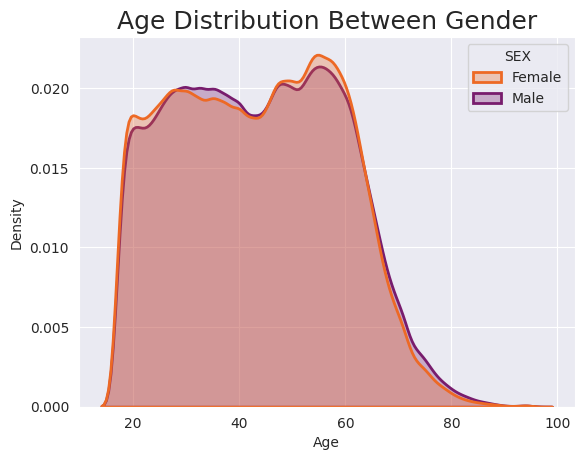

In [31]:
ax = sns.kdeplot(data=df_all,
                 x='AGEP',
                 hue='SEX',
                 shade=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                );
ax.set_xlabel('Age')
ax.set_title('Age Distribution Between Gender', fontsize=18)

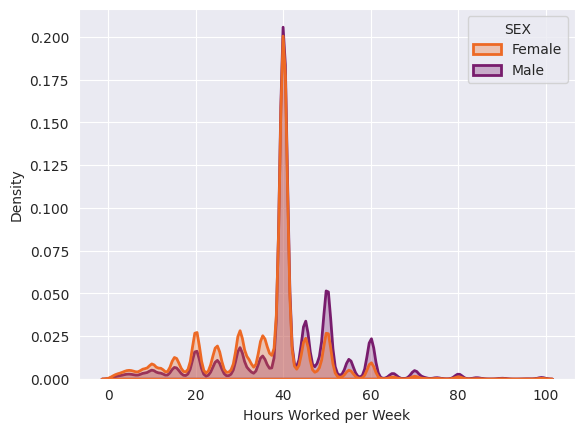

In [32]:
ax = sns.kdeplot(data=df_all,
                 x='WKHP',
                 hue='SEX',
                 shade=True,
                 common_norm=False,
                 palette='inferno_r',
                 linewidth=2,
                 alpha=0.3,
                );
ax.set_xlabel('Hours Worked per Week');